**My Modification Code Which is run with CPU**

---





Epoch 1/10
516/516 [==============================] - 10s 8ms/step - loss: 0.7099 - mae: 0.5685 - val_loss: 0.4347 - val_mae: 0.4538
Epoch 2/10
516/516 [==============================] - 4s 8ms/step - loss: 0.3912 - mae: 0.4425 - val_loss: 0.3949 - val_mae: 0.4477
Epoch 3/10
516/516 [==============================] - 3s 7ms/step - loss: 0.3593 - mae: 0.4238 - val_loss: 0.3776 - val_mae: 0.4289
Epoch 4/10
516/516 [==============================] - 2s 3ms/step - loss: 0.3471 - mae: 0.4118 - val_loss: 0.3610 - val_mae: 0.4262
Epoch 5/10
516/516 [==============================] - 2s 3ms/step - loss: 0.3315 - mae: 0.4020 - val_loss: 0.3440 - val_mae: 0.4136
Epoch 6/10
516/516 [==============================] - 2s 4ms/step - loss: 0.3473 - mae: 0.3959 - val_loss: 0.3235 - val_mae: 0.3907
Epoch 7/10
516/516 [==============================] - 2s 3ms/step - loss: 0.3268 - mae: 0.3897 - val_loss: 0.3188 - val_mae: 0.3817
Epoch 8/10
516/516 [==============================] - 2s 3ms/step - loss: 0

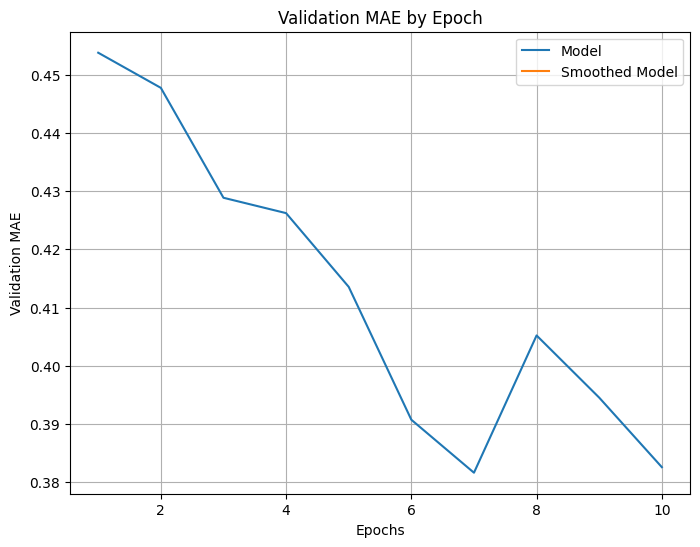

In [1]:
import tensorflow as tf
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess the dataset
california_housing = fetch_california_housing()
X_train, X_test, y_train, y_test = train_test_split(california_housing.data, california_housing.target, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert the datasets into tf.data.Dataset objects
def create_dataset(data, targets, batch_size=32):
    dataset = tf.data.Dataset.from_tensor_slices((data, targets))
    dataset = dataset.cache().shuffle(len(targets)).batch(batch_size).prefetch(tf.data.AUTOTUNE)
    return dataset

train_dataset = create_dataset(X_train_scaled, y_train, batch_size=32)
val_dataset = create_dataset(X_test_scaled, y_test, batch_size=32)

# Build and compile the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(train_dataset, epochs=10, validation_data=val_dataset)

# Visualization
def plot_history(histories, key='mae', smooth_factor=0.9):
    plt.figure(figsize=(8, 6))
    for name, history in histories:
        val = history.history['val_' + key]
        plt.plot(range(1, len(val) + 1), val, label=name.title())
        smoothed = smooth_curve(val[10:], factor=smooth_factor)
        plt.plot(range(11, len(smoothed) + 11), smoothed, label=f"Smoothed {name.title()}")
    plt.title(f'Validation {key.upper()} by Epoch')
    plt.xlabel('Epochs')
    plt.ylabel(f'Validation {key.upper()}')
    plt.legend()
    plt.grid(True)
    plt.show()

def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

plot_history([('model', history)], key='mae')


**My Modification Code Which is run with GPU**

---



Num GPUs Available:  1
Epoch 1/10
516/516 [==============================] - 3s 4ms/step - loss: 0.6929 - mae: 0.5541 - val_loss: 0.4497 - val_mae: 0.5137
Epoch 2/10
516/516 [==============================] - 2s 4ms/step - loss: 0.3976 - mae: 0.4423 - val_loss: 0.3731 - val_mae: 0.4321
Epoch 3/10
516/516 [==============================] - 2s 4ms/step - loss: 0.3716 - mae: 0.4257 - val_loss: 0.3607 - val_mae: 0.4130
Epoch 4/10
516/516 [==============================] - 3s 5ms/step - loss: 0.3481 - mae: 0.4118 - val_loss: 0.3403 - val_mae: 0.4168
Epoch 5/10
516/516 [==============================] - 3s 6ms/step - loss: 0.3383 - mae: 0.4029 - val_loss: 0.3361 - val_mae: 0.3986
Epoch 6/10
516/516 [==============================] - 3s 6ms/step - loss: 0.3255 - mae: 0.3947 - val_loss: 0.3243 - val_mae: 0.3950
Epoch 7/10
516/516 [==============================] - 3s 5ms/step - loss: 0.3218 - mae: 0.3908 - val_loss: 0.3186 - val_mae: 0.3860
Epoch 8/10
516/516 [==============================] -

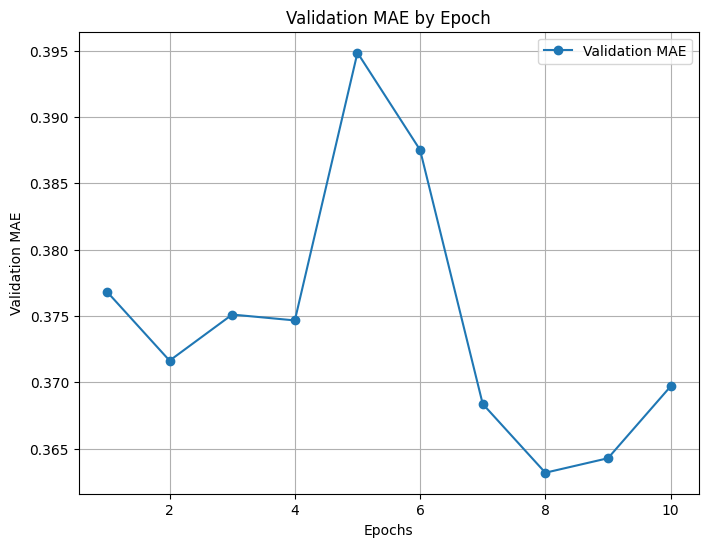

In [5]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt

# Ensure TensorFlow is using the GPU
tf.config.set_soft_device_placement(True)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

# Load the dataset
california_housing = fetch_california_housing()
data = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
targets = california_housing.target

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data, targets, test_size=0.2, random_state=42)

# Data normalization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert the datasets into tf.data.Dataset objects
def create_dataset(data, targets, batch_size=32):
    dataset = tf.data.Dataset.from_tensor_slices((data, targets))
    dataset = dataset.cache()  # Cache the dataset
    dataset = dataset.shuffle(len(targets))  # Shuffle the dataset
    dataset = dataset.batch(batch_size)  # Batch the dataset
    dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)  # Prefetch batches
    return dataset

# Prepare the datasets
batch_size = 32
train_dataset = create_dataset(X_train_scaled, y_train, batch_size)
val_dataset = create_dataset(X_test_scaled, y_test, batch_size)

# Model building function
def build_model(input_shape):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=(input_shape,)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

model = build_model(X_train_scaled.shape[1])

# Model training
history = model.fit(train_dataset, epochs=10, validation_data=val_dataset)

# Visualization corrected
def plot_mae_history(average_mae_history, smooth_mae_history=None):
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, len(average_mae_history) + 1), average_mae_history, marker='o', linestyle='-', label='Validation MAE')
    if smooth_mae_history:
        plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history, marker='o', linestyle='-', color='red', label='Smoothed Validation MAE')
    plt.xlabel('Epochs')
    plt.ylabel('Validation MAE')
    plt.title('Validation MAE by Epoch')
    plt.legend()
    plt.grid(True)
    plt.show()

# Function to smooth the curve
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points
history = model.fit(train_dataset, epochs=10, validation_data=val_dataset)

# Extract the average_mae_history from the history object
average_mae_history = history.history['val_mae']

# Smooth the MAE history and plot
smooth_mae_history = smooth_curve(average_mae_history[10:])
plot_mae_history(average_mae_history, smooth_mae_history)

**<h1>Actual Code which is wast of time and wont run needed 1hr to process</h1>**
---


> all Error and every thing is corrected but wont runn untill the cpu is tosted and gpu is barbequed





In [4]:
import keras
from keras.datasets import boston_housing
from keras import models
from keras import layers
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

# Preprocessing of data
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

# Define the model building function
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

# K-fold validation setup
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

# K-fold validation loop
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]], axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis=0)

    model = build_model()
    model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=1)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=1)
    all_scores.append(val_mae)

print(all_scores)
print(np.mean(all_scores))

# Clear session to free memory
from keras import backend as K
K.clear_session()

# More extensive training with all data
num_epochs = 500
all_mae_histories = []

for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]], axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis=0)

    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets, validation_data=(val_data, val_targets), epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mae']  # Corrected 'val_mean_absolute_error' to 'val_mae' to match Keras conventions
    all_mae_histories.append(mae_history)

# Compute the average of the per-epoch MAE scores for all folds
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

# Plotting
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

# Smoothing function for the MAE history
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()


57026/57026 [==============================] - 0s 0us/step
processing fold # 0
Epoch 1/100
303/303 [==============================] - 3s 4ms/step - loss: 235.9380 - mae: 11.7566
Epoch 2/100
303/303 [==============================] - 2s 5ms/step - loss: 25.4893 - mae: 3.5544
Epoch 3/100
303/303 [==============================] - 1s 4ms/step - loss: 20.8394 - mae: 3.1379
Epoch 4/100
303/303 [==============================] - 1s 4ms/step - loss: 18.0758 - mae: 2.8365
Epoch 5/100
303/303 [==============================] - 1s 4ms/step - loss: 16.1992 - mae: 2.6732
Epoch 6/100
303/303 [==============================] - 1s 5ms/step - loss: 15.3757 - mae: 2.5529
Epoch 7/100
303/303 [==============================] - 1s 4ms/step - loss: 14.4536 - mae: 2.5287
Epoch 8/100
303/303 [==============================] - 1s 3ms/step - loss: 14.1192 - mae: 2.5011
Epoch 9/100
303/303 [==============================] - 1s 3ms/step - loss: 13.0168 - mae: 2.4038
Epoch 10/100
303/303 [========================

KeyboardInterrupt: 